# Task №2
1. Develop yourself using numpy library: 
    - a function to implement gradient descent (GD) algorithm 
    - Adam's optimization algorithm 

for a function of two variables f(x,y).

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
def gradient_descent(x, y, table, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = np.sum((y-y_predicted)**2) / len(y)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        table.add_row([str(i+1), str(current_cost), str(current_weight), str(current_bias)])
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {current_weight}, Bias {current_bias}")
    
    # Making predictions using estimated parameters
    Y_pred = current_weight*X + current_bias


    #Visualization
    plt.figure(figsize = (20,9))
    # Visualizing the weights and cost at for all iterations
    plt.subplot(1, 2, 1)
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")

    # Plotting the regression line
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
                markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.show()
     
    return current_weight, current_bias
 


In [3]:
# Excample data
X = np.random.sample(20)
X = X*100
Y = np.random.sample(20)
Y = Y*100

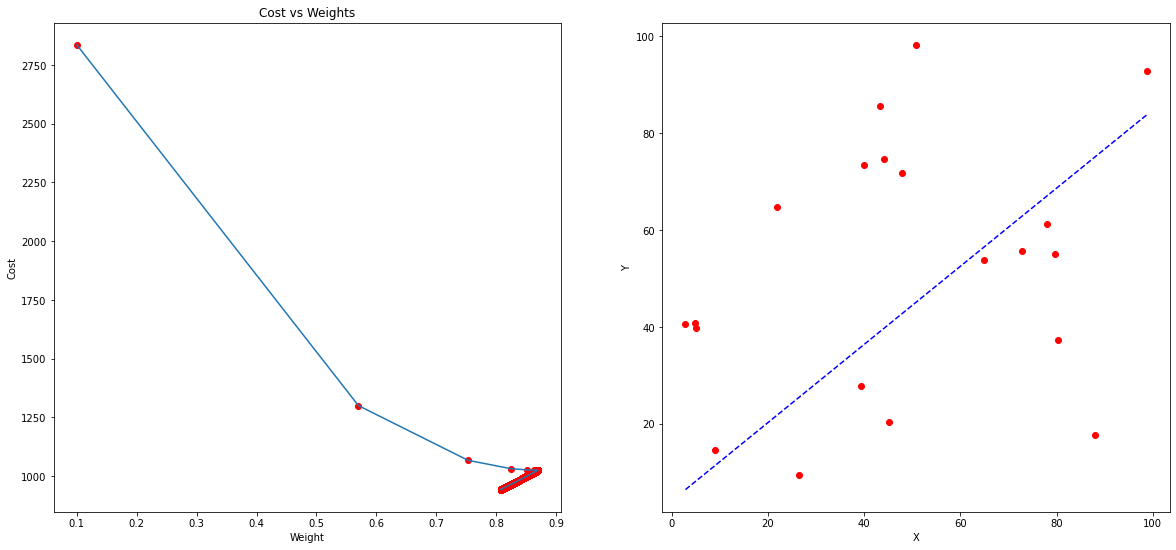

+-----------+--------------------+--------------------+----------------------+
| Iteration |        Cost        |       Weight       |         Bias         |
+-----------+--------------------+--------------------+----------------------+
|     1     | 2836.052553280102  | 0.570089376067942  | 0.01940896459764513  |
|     2     | 1300.2088339862732 | 0.7531383738201587 | 0.024383434246433168 |
|     3     | 1067.2443216658526 | 0.8244038128615977 | 0.027630885319572696 |
|     4     | 1031.8739429514594 | 0.8521368266789533 | 0.03020570378877351  |
|     5     | 1026.4706142286257 |  0.8629167930831   | 0.03251850442236099  |
|     6     | 1025.6120803356866 | 0.8670946511532903 | 0.034729194972316184 |
|     7     | 1025.4428124187446 | 0.8687014184921109 | 0.036900049112373184 |
|     8     | 1025.3780825432127 | 0.8693069143002712 | 0.03905531839237759  |
|     9     | 1025.3292111084593 | 0.8695224810638937 | 0.04120444721767212  |
|     10    | 1025.282749001944  | 0.869586196922876

In [4]:
table = PrettyTable()
table.field_names = ['Iteration', 'Cost', 'Weight', 'Bias']
# Estimating weight and bias using gradient descent
estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=2000, table=table)    

print(table)